In [14]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageChops
import numpy as np
import matplotlib.pyplot as plt

Zad 1

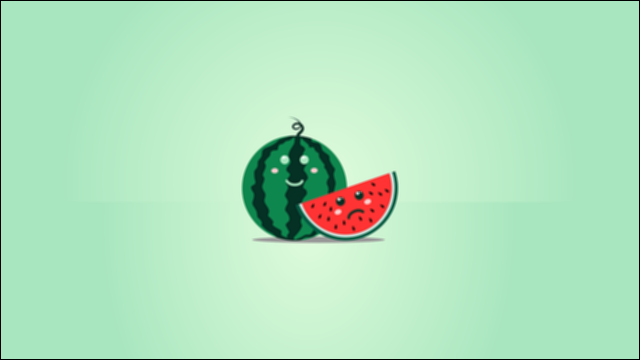

In [15]:
im = Image.open('obraz.png')
def filtruj(obraz, kernel, scale=1):
    # Rozmiar jądra
    kernel_size = int(len(kernel) ** 0.5)
    if kernel_size % 2 == 0:
        raise ValueError("Rozmiar jądra musi być nieparzysty!")

    # Zamiana obrazu na macierz numpy
    obraz_array = np.array(obraz)

    if len(obraz_array.shape) == 3:  # Obsługa obrazów RGB
        # Przetwarzaj każdy kanał osobno
        channels = []
        for channel in range(obraz_array.shape[2]):
            channel_data = obraz_array[:, :, channel]
            # Wymiary obrazu
            height, width = channel_data.shape
            offset = kernel_size // 2

            # Nowy obraz (z wartościami zerowymi)
            wynik_array = np.zeros_like(channel_data, dtype=np.float32)

            # Konwolucja
            for i in range(offset, height - offset):
                for j in range(offset, width - offset):
                    # Wycięcie obszaru dookoła piksela
                    region = channel_data[i - offset:i + offset + 1, j - offset:j + offset + 1]
                    # Zastosowanie jądra
                    wynik_array[i, j] = np.sum(region * np.array(kernel).reshape(kernel_size, kernel_size))

            # Normalizacja przez skalę
            wynik_array /= scale

            # Przycinanie wartości ręcznie
            wynik_array[wynik_array < 0] = 0
            wynik_array[wynik_array > 255] = 255

            channels.append(wynik_array)

        # Połącz przetworzone kanały z powrotem w obraz RGB
        wynik_array = np.stack(channels, axis=2)

    else:  # Obraz w skali szarości
        # Wymiary obrazu
        height, width = obraz_array.shape
        offset = kernel_size // 2

        # Nowy obraz (z wartościami zerowymi)
        wynik_array = np.zeros_like(obraz_array, dtype=np.float32)

        # Konwolucja
        for i in range(offset, height - offset):
            for j in range(offset, width - offset):
                # Wycięcie obszaru dookoła piksela
                region = obraz_array[i - offset:i + offset + 1, j - offset:j + offset + 1]
                # Zastosowanie jądra
                wynik_array[i, j] = np.sum(region * np.array(kernel).reshape(kernel_size, kernel_size))

        # Normalizacja przez skalę
        wynik_array /= scale

        # Przycinanie wartości ręcznie
        wynik_array[wynik_array < 0] = 0
        wynik_array[wynik_array > 255] = 255

    # Konwersja do typu uint8 i zwrócenie obrazu
    return Image.fromarray(wynik_array.astype(np.uint8))

kern1 = [
    1, 1, 1,
    1,1, 1,
    1, 1, 1
]
scale = 9
filtim = filtruj(im,kern1, scale)
filtim

![pierwszy_obraz](obraz.png)

Zad 2

<module 'matplotlib.pyplot' from '/Users/bundam/Desktop/git_uwm/WDGM24/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

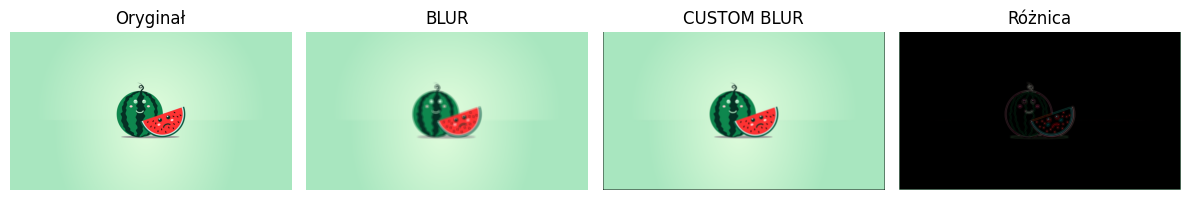

In [16]:
#a.
blurred_im = im.filter(ImageFilter.BLUR)


#b.
blur_ker = [
    1, 1, 1,
    1, 1, 1,
    1, 1, 1
]
custom_blur = filtruj(im, blur_ker, scale=9)

# custom_blur.show()

#c.
difference = ImageChops.difference(blurred_im, custom_blur)

#d.
diff_data = np.array(difference)
stats = {
    "mean" : diff_data.mean(),
    "max" : diff_data.max(),
    "min" : diff_data.min()
}

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.title("Oryginał")
plt.imshow(im)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("BLUR")
plt.imshow(blurred_im)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("CUSTOM BLUR")
plt.imshow(custom_blur)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Różnica")
plt.imshow(difference)
plt.axis("off")

plt.tight_layout()
plt

![obraz_drugi](fig1.png)

Zad 3

<module 'matplotlib.pyplot' from '/Users/bundam/Desktop/git_uwm/WDGM24/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

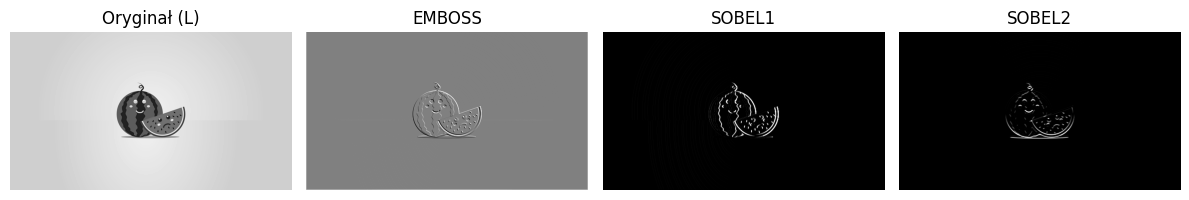

In [17]:
im2 = im.copy().convert('L')

#a. Emboss
embossim = im2.filter(ImageFilter.EMBOSS)
#b. Sobel
s1k = [-1, 0, 1, -2, 0, 2, -1, 0, 1]
s2k = [-1, -2, -1, 0, 0 ,0, 1, 2, 1]

s1im = filtruj(im2, s1k, scale=1)
s2im = filtruj(im2, s2k, scale=2)

#c
plt.figure(figsize=(12,6))

# Oryginalny obraz w skali szarości
plt.subplot(1, 4, 1)
plt.title("Oryginał (L)")
plt.imshow(im2, cmap="gray")
plt.axis("off")

# Filtr EMBOSS
plt.subplot(1, 4, 2)
plt.title("EMBOSS")
plt.imshow(embossim, cmap="gray")
plt.axis("off")

# Filtr Sobel1
plt.subplot(1, 4, 3)
plt.title("SOBEL1")
plt.imshow(s1im, cmap="gray")
plt.axis("off")

# Filtr Sobel2
plt.subplot(1, 4, 4)
plt.title("SOBEL2")
plt.imshow(s2im, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt

![obraz_trzeci](fig2.png)

Zad 4

<module 'matplotlib.pyplot' from '/Users/bundam/Desktop/git_uwm/WDGM24/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

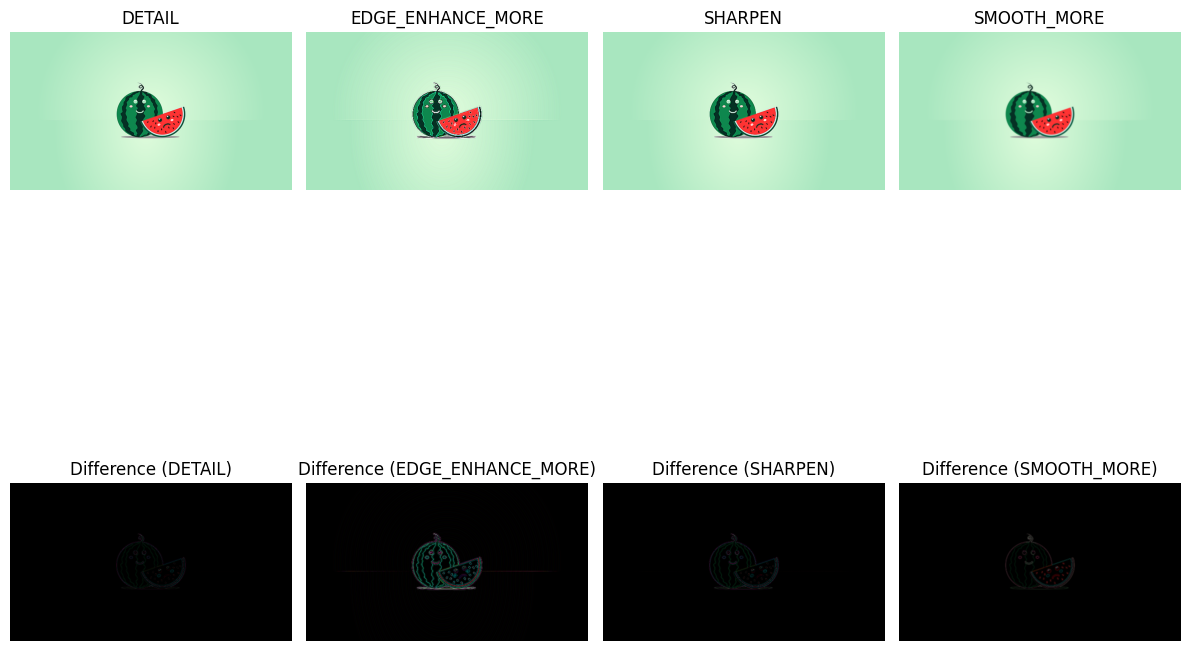

In [18]:
filters = [
    (ImageFilter.DETAIL, "DETAIL"),
    (ImageFilter.EDGE_ENHANCE_MORE, "EDGE_ENHANCE_MORE"),
    (ImageFilter.SHARPEN, "SHARPEN"),
    (ImageFilter.SMOOTH_MORE, "SMOOTH_MORE"),
]

plt.figure(figsize=(12, 12))
for idx, (filter_obj, filter_name) in enumerate(filters):
    # Zastosowanie filtru
    filtered_image = im.filter(filter_obj)

    # Obliczenie różnicy
    difference_image = ImageChops.difference(im.copy(), filtered_image)

    # Obraz przefiltrowany
    plt.subplot(2, len(filters), idx + 1)
    plt.title(filter_name)
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")

    # Różnica z oryginałem
    plt.subplot(2, len(filters), len(filters) + idx + 1)
    plt.title(f"Difference ({filter_name})")
    plt.imshow(difference_image, cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt

![obraz_czwarty](fig3.png)

Zad 5

<module 'matplotlib.pyplot' from '/Users/bundam/Desktop/git_uwm/WDGM24/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

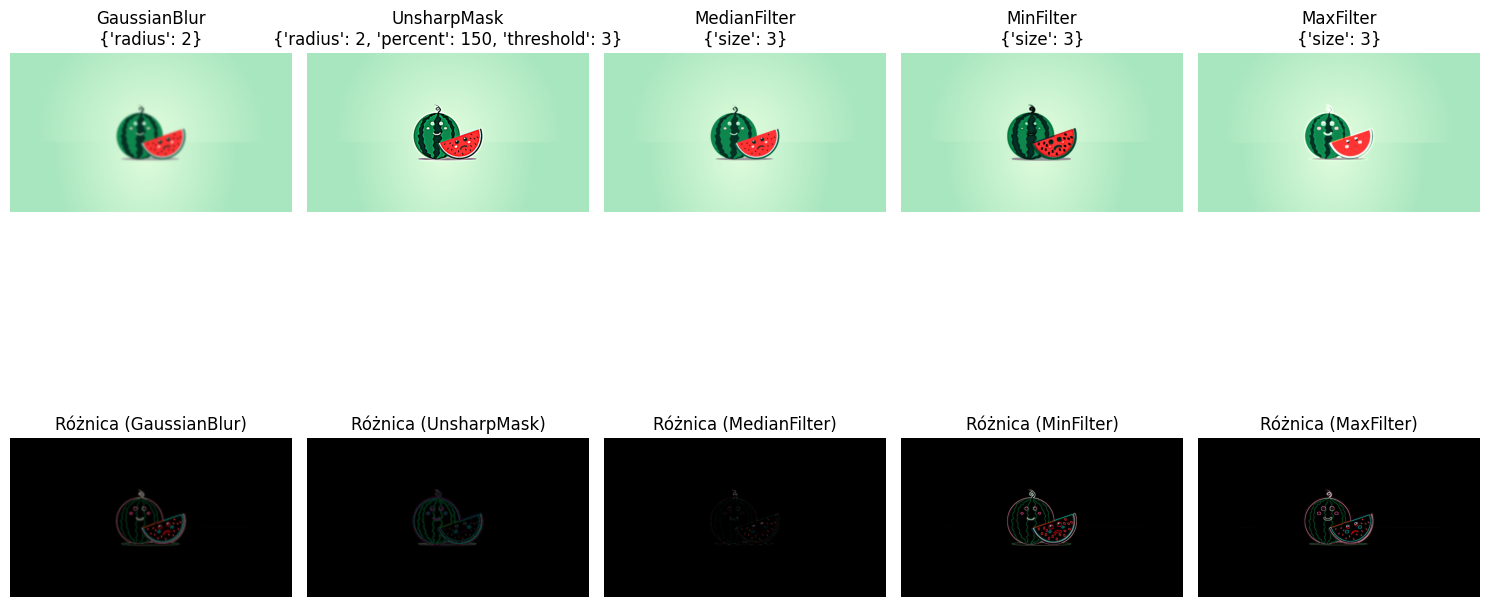

In [19]:
filters2 = [
    (ImageFilter.GaussianBlur(radius=2), "GaussianBlur", {"radius": 2}),
    (ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3), "UnsharpMask", {"radius": 2, "percent": 150, "threshold": 3}),
    (ImageFilter.MedianFilter(size=3), "MedianFilter", {"size": 3}),
    (ImageFilter.MinFilter(size=3), "MinFilter", {"size": 3}),
    (ImageFilter.MaxFilter(size=3), "MaxFilter", {"size": 3}),
]
plt.figure(figsize=(15, 10))

for idx, (filter_obj, filter_name, params) in enumerate(filters2):
    # Zastosowanie filtru
    filtered_image = im.filter(filter_obj)

    # Obliczenie różnicy
    difference_image = ImageChops.difference(im, filtered_image)

    # Obraz przefiltrowany
    plt.subplot(2, len(filters2), idx + 1)
    plt.title(f"{filter_name}\n{params}")
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")

    # Różnica z oryginałem
    plt.subplot(2, len(filters2), len(filters2) + idx + 1)
    plt.title(f"Różnica ({filter_name})")
    plt.imshow(difference_image, cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt

![obraz_piąty](fig4.png)